### 1. 벡터 간 거리 : 유클리드 거리 vs 코사인 거리

In [5]:
a = np.array([[4],[5],[2],[2]])
b = np.array([[4],[0],[2],[0]])
c = np.array([[2],[2],[0],[1]])

### 1-1) 유클리드 거리

- 피타고라스 정리에 따른 벡터 간 기하학적 거리

In [7]:
# 유클리드 거리
# a-b
a_b = np.linalg.norm(a)**2 + np.linalg.norm(b)**2 - 2*a.T@b

# b-c
b_c = np.linalg.norm(b)**2 + np.linalg.norm(c)**2 - 2*b.T@c

# a-c
a_c = np.linalg.norm(a)**2 + np.linalg.norm(c)**2 - 2*a.T@c

In [9]:
print('a와 b 사이 : {}, b와 c 상 : {}, c와 a 사이 : {}'.format(a_b[0][0],b_c[0][0],a_c[0][0]))

a와 b 사이 : 29.0, b와 c 상 : 13.000000000000004, c와 a 사이 : 18.0


### 1-2) 코사인 거리

- 방향이 유사한 벡터의 코사인 거리가 작음
- 코사인 거리 = 1 - 코사인 유사도
- 코사인 유사도 최대값 : 1

In [10]:
# 코사인 거리
a_b_simil = (a.T@b) / (np.linalg.norm(a)*np.linalg.norm(b))
b_c_simil = (b.T@c) / (np.linalg.norm(b)*np.linalg.norm(c))
c_a_simil = (c.T@a) / (np.linalg.norm(c)*np.linalg.norm(a))

In [11]:
a_b = 1 - a_b_simil
b_c = 1 - b_c_simil
c_a = 1 - c_a_simil

In [13]:
print('a와 b 사이 : {}, b와 c 상 : {}, c와 a 사이 : {}'.format(a_b[0][0],b_c[0][0],c_a[0][0]))

a와 b 사이 : 0.36112343500006017, b와 c 상 : 0.40371520600005606, c와 a 사이 : 0.04761904761904767


### 결과

- 유클리드 거리 기준 가장 가까운 벡터 : b 와 c
- 코사인 거리 기준 가장 가까운 벡터 : a 와 c

### 2. Transformation Matrix : Image transformation

- scipy.ndimage 패키지의 affine_transform() 명령을 사용
- **이미지 픽셀 값을 새로운 좌표로 이동시킴**

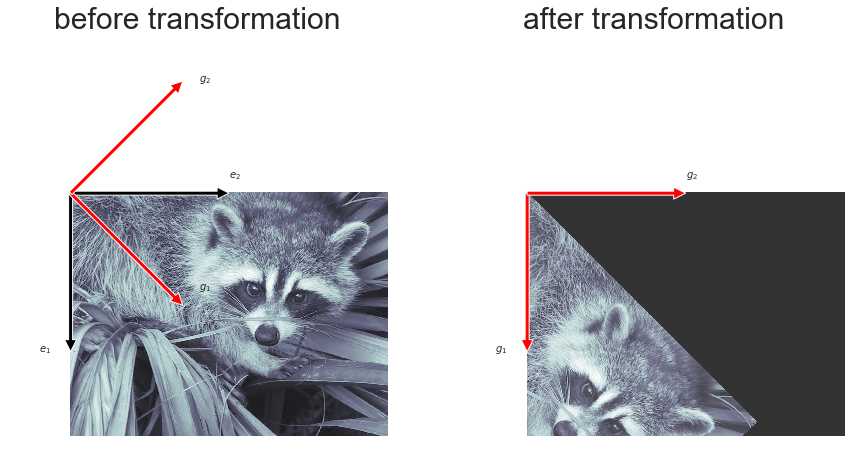

In [37]:
%matplotlib inline
import scipy as sp
import scipy.misc
import scipy.ndimage

f = sp.misc.face(gray=True)

e1 = np.array([0, 1]) # matplotlib의 이미지 좌표규약으로 부호변경 
e2 = np.array([1, 0])
E = np.vstack([e1, e2]).T
g1 = np.array([1, 1]) / np.sqrt(2)
g2 = np.array([-1, 1]) / np.sqrt(2)
A = np.vstack([g1, g2]).T
gc1 = E @ g1
gc2 = E @ g2

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(f, cmap=mpl.cm.bone, alpha=0.9)
plt.annotate('', xy=500*e1, xytext=(0,0),arrowprops=dict(facecolor='black'))
plt.annotate('$e_1$', xy=500*e1, xytext=500*e1 + [-100,0])
plt.annotate('', xy=500*e2, xytext=(0,0),arrowprops=dict(facecolor='black'))
plt.annotate('$e_2$', xy=500*e2, xytext=500*e2 + [0, -50])
plt.annotate('', xy=500*gc1, xytext=(0, 0),arrowprops=dict(facecolor='red'))
plt.annotate('$g_1$', xy=500*gc1, xytext=500*gc1 + [50, -50])
plt.annotate('', xy=500*gc2, xytext=(0, 0),arrowprops=dict(facecolor='red'))
plt.annotate('$g_2$', xy=500*gc2, xytext=500*gc2 + [50, 0])
plt.axis("off")
plt.xlim(-200, 1000)
plt.ylim(800, -500)
plt.title("before transformation",fontsize=30)

# 기존 이미지(표준기저벡터 E 기준)를 A기준으로 기저변환해 저장하는 메서드 sp.ndimage.affine_transform()
f1 = sp.ndimage.affine_transform(f, A) 

plt.subplot(122)
plt.imshow(f1, cmap=mpl.cm.bone, alpha=0.8)
plt.annotate('', xy=500*e1, xytext=(0,0),arrowprops=dict(facecolor='red'))
plt.annotate('$g_1$', xy=500*e1, xytext=500*e1 + [-100,0])
plt.annotate('', xy=500*e2, xytext=(0,0),arrowprops=dict(facecolor='red'))
plt.annotate('$g_2$', xy=500*e2, xytext=500*e2 + [0, -50])
plt.axis("off")
plt.xlim(-200, 1000)
plt.ylim(800, -500)
plt.title("after transformation",fontsize=30)
plt.show()